In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Chargement des données croisées
req_df = pd.read_excel("../Clean_data/Requêtes_all.xlsx")
pages_df = pd.read_excel("../Clean_data/Pages_all.xlsx")
pays_df = pd.read_excel("../Clean_data/Pays_all.xlsx")
apparence_df = pd.read_excel("../Clean_data/Apparence_dans_les_résultats_de_recherche_all.xlsx")
apparail_df = pd.read_excel("../Clean_data/Appareils_all.xlsx")
dates_df = pd.read_excel("../Clean_data/Dates_all.xlsx")
filtres_df = pd.read_excel("../Clean_data/Filtres_all.xlsx")

# Nettoyage de base
req_df = req_df[req_df['Source'] != 'Global']
pages_df = pages_df[pages_df['Source'] != 'Global']
pays_df = pays_df[pays_df['Source'] != 'Global']
apparence_df = apparence_df[apparence_df['Source'] != 'Global']
apparail_df = apparail_df[apparail_df['Source'] != 'Global']
dates_df = dates_df[dates_df['Source'] != 'Global']
filtres_df = filtres_df[filtres_df['Source'] != 'Global']

req_df.rename(columns={"Requêtes_les_plus_fréquentes": "Requete"}, inplace=True)
pages_df.rename(columns={"Pages_les_plus_populaires": "Page"}, inplace=True)
apparence_df.rename(columns={"Apparence_dans_les_résultats_de_recherche": "Apparence"}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15736\609816192.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(matching_counts.keys()), y=list(matching_counts.values()), palette="mako")


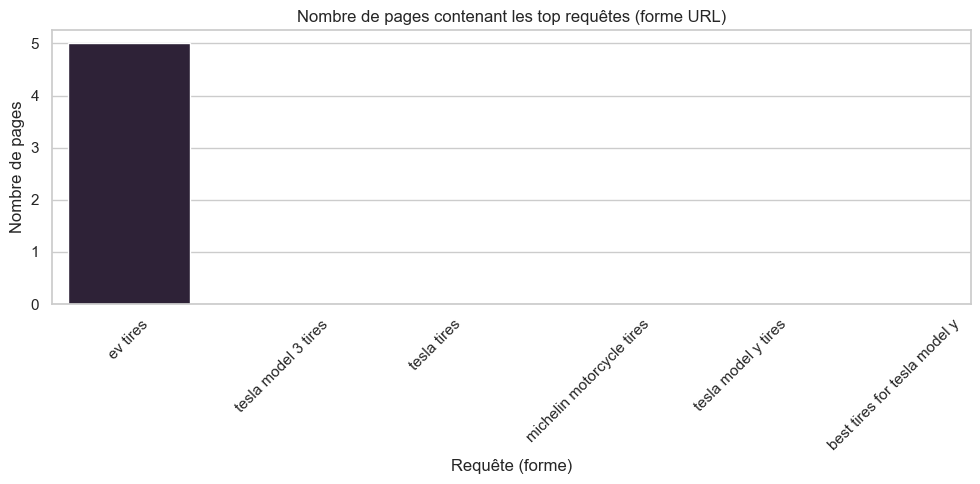

In [5]:
# 1. Croisement requêtes - pages : étudier si les pages performantes contiennent les requêtes fortes
# Ici on pourrait matcher si une requête est partiellement incluse dans une URL
keywords = req_df.sort_values("Clics", ascending=False).head(10)['Requete']

matching_counts = {
    keyword: pages_df['Page'].str.contains(keyword.replace(" ", "-").lower(), case=False).sum()
    for keyword in keywords
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(matching_counts.keys()), y=list(matching_counts.values()), palette="mako")
plt.title("Nombre de pages contenant les top requêtes (forme URL)")
plt.xticks(rotation=45)
plt.ylabel("Nombre de pages")
plt.xlabel("Requête (forme)")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15736\1100453248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=apparail_df, x="Appareil", y="CTR", palette="pastel")


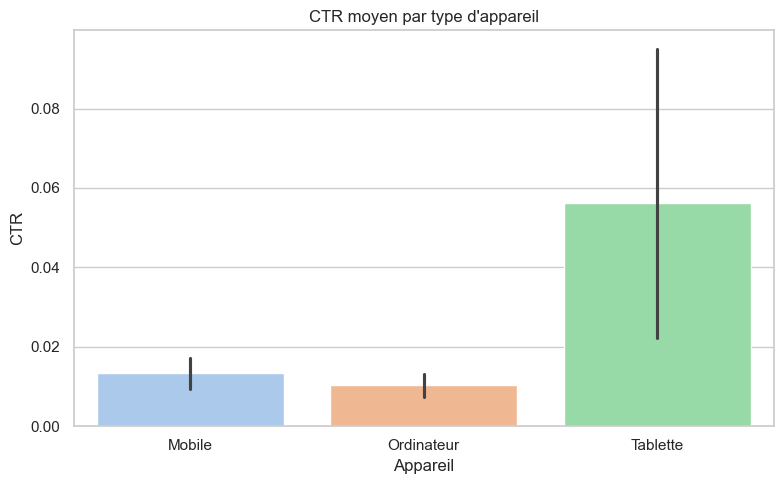

In [6]:
# 2. Croisement appareils - CTR : quels appareils performent le mieux ?
plt.figure(figsize=(8, 5))
sns.barplot(data=apparail_df, x="Appareil", y="CTR", palette="pastel")
plt.title("CTR moyen par type d'appareil")
plt.ylabel("CTR")
plt.xlabel("Appareil")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15736\3028116013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=apparence_df, x="Apparence", y="CTR", palette="Set2")


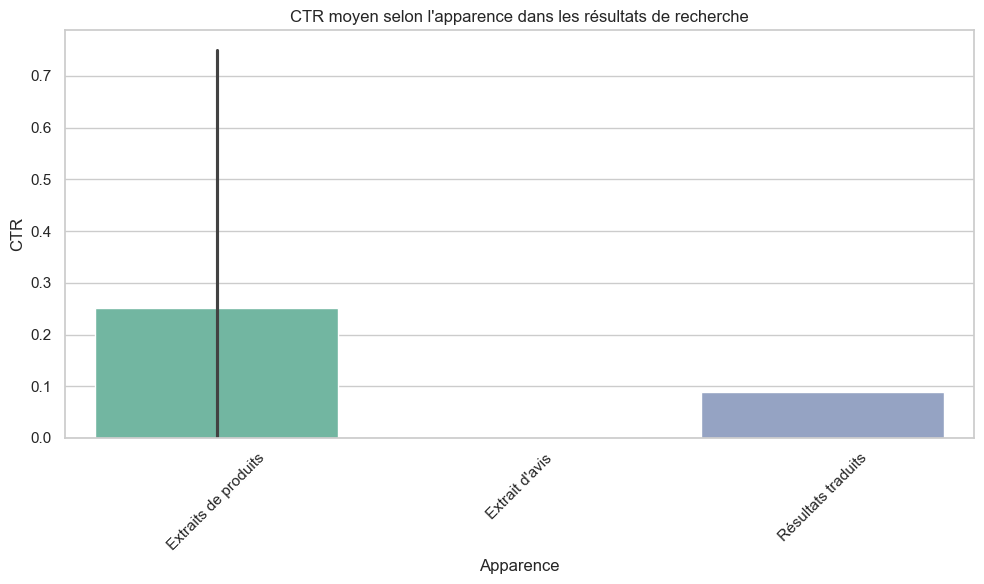

In [9]:
# 3. Apparence vs CTR : les formats d’affichage impactent-ils le CTR ?
plt.figure(figsize=(10, 6))
sns.barplot(data=apparence_df, x="Apparence", y="CTR", palette="Set2")
plt.title("CTR moyen selon l'apparence dans les résultats de recherche")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

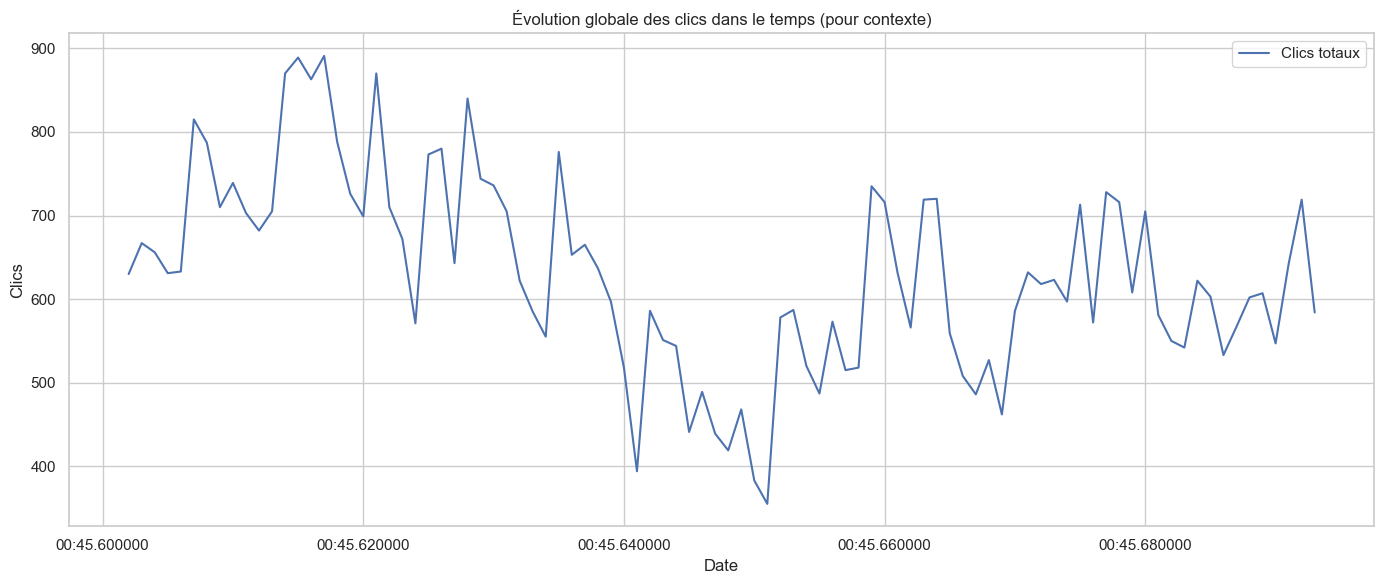

In [10]:
# 4. Croisement temporel : évolution des clics pour les requêtes stratégiques
top_keywords = req_df.sort_values("CTR", ascending=False).head(5)['Requete']
dates_df['Date'] = pd.to_datetime(dates_df['Date'], errors='coerce')

# Plot global pour toutes les sources confondues (pas de lien direct avec requête donc illustratif)
plt.figure(figsize=(14, 6))
sns.lineplot(data=dates_df.groupby("Date")["Clics"].sum().reset_index(), x="Date", y="Clics", label="Clics totaux")
plt.title("Évolution globale des clics dans le temps (pour contexte)")
plt.xlabel("Date")
plt.ylabel("Clics")
plt.tight_layout()
plt.show()

In [ ]:
# continuer avec des analyses ciblées sur le marché méxicain